# Assignment17

In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link: 
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line 

Hint: 
Following is the command import packages and data

`from pandas import read_csv `

`from pandas import datetime `

`from matplotlib import pyplot `

`from statsmodels.tsa.arima_model import ARIMA `

`from sklearn.metrics import mean_squared_error `

`def parser(x): `

`return datetime.strptime('190'+x, '%Y-%m') `

`series=read_csv('shampoo-sales.csv',header=0,parse_dates=[0],index_col=0,squeeze=True, date_parser=parser)`

In [24]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

series=read_csv('K:\Python\ACD_MDS_Offline_V2_Session_17_Code\shampoo-sales.csv',header=0,parse_dates=[0],index_col=0,squeeze=True, date_parser=parser)

In [25]:
series.head()

Month
2011-01-01    266.0
2011-02-01    145.9
2011-03-01    183.1
2011-04-01    119.3
2011-05-01    180.3
Name: Sales, dtype: float64

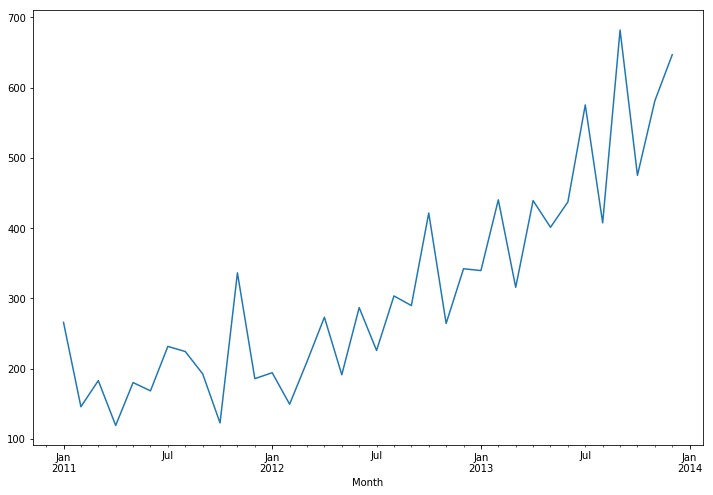

In [29]:
# Plot the sales over time
%matplotlib inline
series.plot(figsize=(12,8))

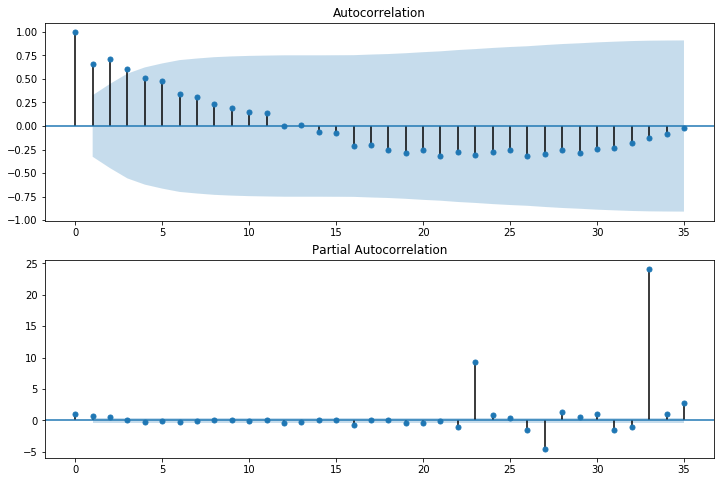

In [61]:
#Check AutoCorrelation plots
import statsmodels.api as sm
%matplotlib inline
fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=35, ax=ax2)

In [101]:
arima_model=ARIMA(series,(1,1,1)).fit()
print(arima_model.params)

const            12.096482
ar.L1.D.Sales    -0.567381
ma.L1.D.Sales    -0.513268
dtype: float64


K:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
K:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [102]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Sat, 25 May 2019   AIC                            402.467
Time:                        17:05:18   BIC                            408.688
Sample:                    02-01-2011   HQIC                           404.614
                         - 12-01-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0965      3.651      3.313      0.002       4.940      19.253
ar.L1.D.Sales    -0.5674      0.161     -3.526      0.001      -0.883      -0.252
ma.L1.D.Sales    -0.5133      0.155     -3.303      0.002      -0.818      -0.209
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7625           +0.0000j            1.7625            0.5000
MA.1            1.9483           +0.0000j            1.9483            0.0000
-----------------------------------------------------------------------------
"""

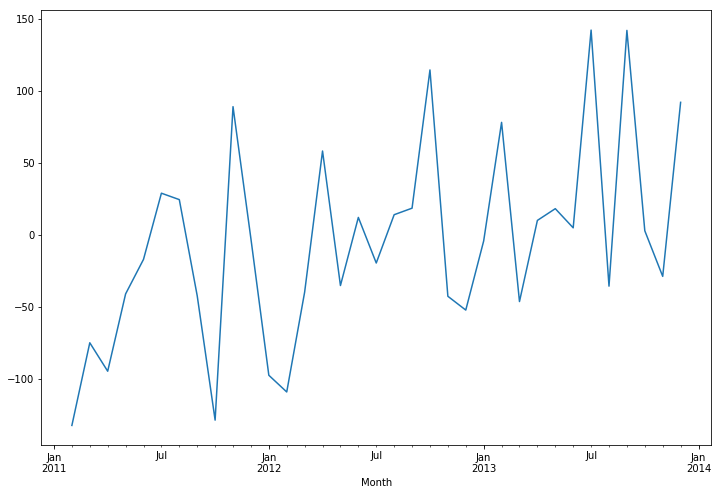

In [103]:
# show plots of arima model
%matplotlib inline
fig = pyplot.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_model.resid.plot(ax=ax);

In [106]:
#Predict the data as per model

predict_data = arima_model.predict('2012-01-01', '2016-01-01', dynamic=False)
print(predict_data)

2012-01-01    105.781638
2012-02-01     64.176662
2012-03-01    100.312674
2012-04-01      4.959769
2012-05-01    -46.791513
2012-06-01     83.448329
2012-07-01    -41.518862
2012-08-01     63.569055
2012-09-01    -32.270582
2012-10-01     17.201220
2012-11-01   -114.532800
2012-12-01    129.943672
2013-01-01      1.581256
2013-02-01     22.581085
2013-03-01    -78.271379
2013-04-01    113.326353
2013-05-01    -56.225461
2013-06-01     31.165709
2013-07-01     -4.055264
2013-08-01   -132.359224
2013-09-01    132.464944
2013-10-01   -209.580180
2013-11-01    134.759065
2013-12-01    -26.421449
2014-01-01    -65.492045
2014-02-01     56.118709
2014-03-01    -12.880878
2014-04-01     26.268152
2014-05-01      4.055750
2014-06-01     16.658637
2014-07-01      9.508003
2014-08-01     13.565134
2014-09-01     11.263196
2014-10-01     12.569271
2014-11-01     11.828230
2014-12-01     12.248682
2015-01-01     12.010126
2015-02-01     12.145478
2015-03-01     12.068682
2015-04-01     12.112255


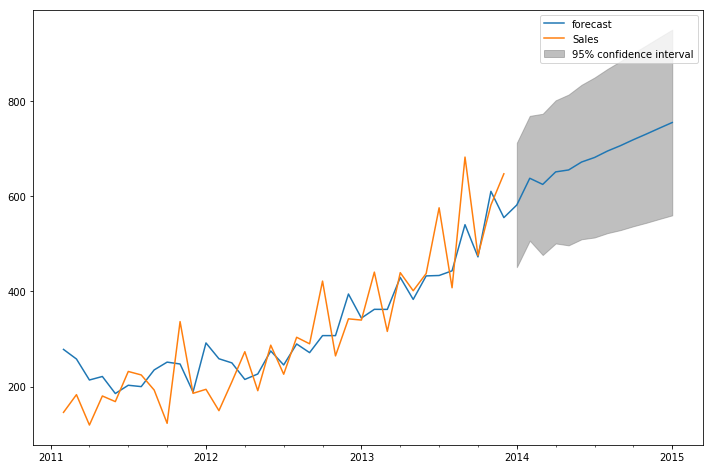

In [116]:
#Predicted model plot
%matplotlib inline
fig = pyplot.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_model.plot_predict(1,48,ax=ax);